In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import statistics
import math
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

# Bootstrap

In [592]:
SAMPLE_SIZE = 50
ITERATION = 100

In [578]:
sample_ids = [list(range(1,101))]

In [579]:
# PatientId(1~100)
sample_ids = []
for _ in range(ITERATION):
    x = np.random.choice(range(1,101), size=SAMPLE_SIZE, replace=True)
    x.sort()
    sample_ids.append(list(x))

# sample_ids

In [501]:
import pickle 

with open(f"./bootstrap", "wb") as fp:   #Pickling
    pickle.dump(sample_ids, fp)

In [54]:
with open(f"./bootstrap", "rb") as fp:   # Unpickling
    sample_ids = pickle.load(fp)

# Image-based

In [55]:
# def accuracy(x,y):
#     check = list(x == y)
#     correct = check.count(True)
#     accuracy = correct/SAMPLE_SIZE
#     return accuracy

def TPTNFPFN(x,answer):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(answer)):
        if answer[i] == 1:
            if x[i] == 1:
                TP += 1
            elif x[i] == 0:
                FN += 1
        elif answer[i] == 0:
            if x[i] == 0:
                TN += 1
            elif x[i] == 1:
                FP += 1
#     print(f'TP is {TP}')
#     print(f'TN is {TN}')
#     print(f'FP is {FP}')
#     print(f'FN is {FN}')
    return TP, TN, FP, FN

def accuracy(answer, x):
    TP, TN, FP, FN = TPTNFPFN(x, answer)
    
    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    
#     print(f'sensitivity {sensitivity}')
#     print(f'specificity {specificity}')
#     print(f'accuracy {accuracy}')

    return sensitivity, specificity, accuracy

In [56]:
raters = ['R11_1', 'R14_1', 'R15_1', 'R16_1', 'R20_1', 'R21_1', 'R23_1', 'R26_1', 'R28_1', 'R29_1']

In [57]:
def accuracies(ct_df, silver_df, samples):
    accuracies_ = []
    for sample in samples:
        sample = list(np.array(sample)-1)
        sample_ct = ct_df.iloc[sample].reset_index(drop=True)
        sample_silver = silver_df.iloc[sample].reset_index(drop=True)
        acc = accuracy(sample_ct[sample_ct.columns[0]], sample_silver[sample_silver.columns[0]])
        accuracies_.append(acc)
        
    return accuracies_

In [58]:
ct = pd.read_csv(f'./constructed/image-based_CT.csv')

In [59]:
indiv = pd.read_csv(f'./constructed/image-based_1_majority_votes.csv')[['1vote4']] # R20
indiv_acc = accuracies(ct, indiv, sample_ids)

In [60]:
mv = pd.read_csv(f'./constructed/image-based_7_majority_votes.csv')[['7vote7']]
mv_acc = accuracies(ct, mv, sample_ids)

In [61]:
cons2 = pd.read_csv(f'./constructed/image-based_consensus2.csv')
cons2_acc = accuracies(ct, cons2, sample_ids)

In [62]:
cons3 = pd.read_csv(f'./constructed/image-based_consensus3.csv')
cons3_acc = accuracies(ct, cons3, sample_ids)

In [63]:
lca2 = pd.read_csv(f'./constructed/image-based_lca_2.csv')
lca2_acc = accuracies(ct, lca2, sample_ids)

In [64]:
lca3 = pd.read_csv(f'./constructed/image-based_lca_3.csv')
lca3_acc = accuracies(ct, lca3, sample_ids)

## Distribution Comparison

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


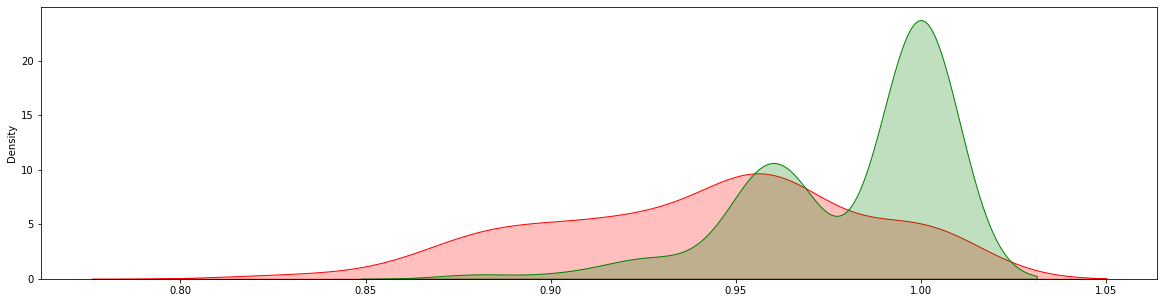

In [65]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = np.array(indiv_acc)[:,1], color="red", shade=True)
sns.kdeplot(data = np.array(mv_acc)[:,1], color="orange", shade=True)
sns.kdeplot(data = np.array(cons2_acc)[:,1], color="yellow", shade=True)
sns.kdeplot(data = np.array(cons3_acc)[:,1], color="green", shade=True)
sns.kdeplot(data = np.array(lca2_acc)[:,1], color="blue", shade=True)
sns.kdeplot(data = np.array(lca3_acc)[:,1], color="purple", shade=True)
plt.show()

In [70]:
from scipy import stats

names = ['indiv_acc','mv_acc','cons2_acc','cons3_acc','lca2_acc','lca3_acc']
names_combs = list(combinations(names,2))

m = 1

for idx, comb in enumerate(list(combinations([np.array(indiv_acc)[:,m],np.array(mv_acc)[:,m],np.array(cons2_acc)[:,m],np.array(cons3_acc)[:,m],np.array(lca2_acc)[:,m],np.array(lca3_acc)[:,m]],2))):
    t_stat, p_val = stats.ttest_ind(list(comb)[0], list(comb)[1],
                                    equal_var=False)
    print(names_combs[idx])
    print(f"t-statistics:{t_stat}, p-value: {p_val}")

('indiv_acc', 'mv_acc')
t-statistics:-13.87034001921044, p-value: 6.0772249881320035e-25
('indiv_acc', 'cons2_acc')
t-statistics:-13.87034001921044, p-value: 6.0772249881320035e-25
('indiv_acc', 'cons3_acc')
t-statistics:-8.063930977766159, p-value: 1.3889746107011097e-13
('indiv_acc', 'lca2_acc')
t-statistics:-13.87034001921044, p-value: 6.0772249881320035e-25
('indiv_acc', 'lca3_acc')
t-statistics:-13.87034001921044, p-value: 6.0772249881320035e-25
('mv_acc', 'cons2_acc')
t-statistics:nan, p-value: nan
('mv_acc', 'cons3_acc')
t-statistics:6.964395951292852, p-value: 3.6685104646672857e-10
('mv_acc', 'lca2_acc')
t-statistics:nan, p-value: nan
('mv_acc', 'lca3_acc')
t-statistics:nan, p-value: nan
('cons2_acc', 'cons3_acc')
t-statistics:6.964395951292852, p-value: 3.6685104646672857e-10
('cons2_acc', 'lca2_acc')
t-statistics:nan, p-value: nan
('cons2_acc', 'lca3_acc')
t-statistics:nan, p-value: nan
('cons3_acc', 'lca2_acc')
t-statistics:-6.964395951292852, p-value: 3.6685104646672857e-1

In [67]:
# 95% CI

lst = [indiv_acc,mv_acc,cons2_acc,cons3_acc,lca2_acc,lca3_acc]
for item in lst:
    x = np.array(item)[:,2]

    m = statistics.mean(x)
    s = statistics.stdev(x)

    dof = len(x)

    confidence = 0.95

    t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

    print(m, (m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof)))

0.8212 (0.8111140772178862, 0.8312859227821139)
0.8434 (0.8331075015952977, 0.8536924984047024)
0.8106 (0.799229774848733, 0.8219702251512669)
0.792 (0.7808053391640637, 0.8031946608359364)
0.8626 (0.853084705425303, 0.872115294574697)
0.8742 (0.8647074633155832, 0.8836925366844167)


# Lesion-based

In [19]:
# 1    2    3    4    5    6    7    8    9    10
# R11, R14, R15, R16, R20, R21, R23, R26, R28, R29

raters = ['R11', 'R14', 'R15', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28', 'R29']

In [20]:
lesion_df = pd.read_csv('./Lesion_based_data/lesion_df.csv').reset_index()

In [21]:
def str2arr(strg):
    if strg in [0,'0']:
        return 0

    coors = strg[1:-1].split(' ')
    while '' in coors:
        coors.remove('')
    coors = np.array(coors).astype(float)
    return coors

# herbwood.tistory.com/3?category=867198
# Boolean function for intersection
def boxesIntersect(boxA, boxB):
    if type(boxA) == str:
        boxA = str2arr(boxA)
    if type(boxB) == str:
        boxB = str2arr(boxB)
    
    if type(boxA) == int:
        if type(boxB) == int: # TN
            return 'TN'
        else: # FP
            return 'FP'
        
    elif type(boxB) == int: # FN
        return 'FN'
    
    else: # TP 일수도 아닐 수도 (겹치면 True, 안겹치면 False)
        boxA = boxA.astype(float)
        boxB = boxB.astype(float)

        if boxA[0] > boxB[2]:
            return 'FP' # boxA is on the right of boxB
        if boxB[0] > boxA[2]:
            return 'FP' # boxA is on the left of boxB
        if boxA[3] < boxB[1]:
            return 'FP' # boxA is above boxB
        if boxA[1] > boxB[3]:
            return 'FP' # boxA is below boxB
        return True

def iou(A,B):  
    if boxesIntersect(A, B) != True:
        return 0
    
    if type(A) == str:
        A = str2arr(A)
    if type(B) == str:
        B = str2arr(B)
    
    A = A.astype(float)
    B = B.astype(float)
    
    # A = (x1, y1, x2, y2)
    A_area = (A[2] - A[0] + 1) * (A[3] - A[1] + 1)
    B_area = (B[2] - B[0] + 1) * (B[3] - B[1] + 1)

    # find intersection box
    x1 = max(A[0], B[0])
    y1 = max(A[1], B[1])
    x2 = min(A[2], B[2])
    y2 = min(A[3], B[3])

    # compute the width and height of the intersection
    w = max(0, x2 - x1 + 1)
    h = max(0, y2 - y1 + 1)

    inter = w * h
    iou_ = inter / (A_area + B_area - inter)

    return iou_

def check_box_in_list(box, boxlist, thres):
    for boxx in boxlist:
        if type(str2arr(boxx)) != int:
            box2 = str2arr(box)
            boxx = str2arr(boxx)

            box2 = box2.astype(float)
            boxx = boxx.astype(float)

            if box2[0] > boxx[2]:
                continue # boxA is on the right of boxB
            if boxx[0] > box2[2]:
                continue # boxA is on the left of boxB
            if box2[3] < boxx[1]:
                continue # boxA is above boxB
            if box2[1] > boxx[3]:
                continue # boxA is below boxB
            if iou(box2, boxx)>thres:
                return True
    return False

def marking(ct, silver,thres):
    result = []

    pids = list(set(silver['DB_PatientId']))
    pids.sort()
    pids
    
    for caseId in pids:
#         print(f'===========Case {caseId}=========')
        ct_ans = list(ct[ct['DB_PatientId']==caseId]['mask'])[0]
        silver_ans = list(silver[silver['DB_PatientId']==caseId]['mask'])
        for i in range(len(silver_ans)):
#             print(ct_ans, silver_ans[i])
#             print(boxesIntersect(ct_ans, silver_ans[i]))
            if boxesIntersect(ct_ans, silver_ans[i]) == True:
#                 print(iou(ct_ans, silver_ans[i]))
                if iou(ct_ans, silver_ans[i])>thres:
#                     print('TP')
                    result.append('TP')
                else:
#                     print('FP')
                    result.append('FP')
            else:
                result.append(boxesIntersect(ct_ans, silver_ans[i]))
        if type(str2arr(ct_ans)) != int:
            if not check_box_in_list(ct_ans, silver_ans, thres):
                result.append('FN')
    return result

# def f1score(silver, thres, prnt=True):
#     result = marking(silver, thres)

#     TP = result.count('TP')
#     FP = result.count('FP')
#     TN = result.count('TN')
#     FN = result.count('FN')

#     precision = TP / (TP+FP)
#     recall = TP / (TP+FN)

#     f1 = 2 * (precision * recall)/(precision+recall)
    
#     if prnt:
#         print(f'TP {TP}')
#         print(f'FP {FP}')
#         print(f'TN {TN}')
#         print(f'FN {FN}')
#         print(f'precision {precision}')
#         print(f'recall {recall}')
#         print(f'f1-score {f1}')

#     return precision, recall, f1

def accuracies(ct, silver, thres, prnt=True):
    result = marking(ct, silver, thres)

    TP = result.count('TP')
    FP = result.count('FP')
    TN = result.count('TN')
    FN = result.count('FN')

    sensitivity = TP / (TP+FN)
    specificity = TN / (TN+FP)
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    
    if prnt:
        print(f'TP {TP}')
        print(f'FP {FP}')
        print(f'TN {TN}')
        print(f'FN {FN}')
        print(f'sensitivity {sensitivity}')
        print(f'specificity {specificity}')
        print(f'accuracy {accuracy}')

    return sensitivity, specificity, accuracy

In [22]:
THRES = 0.1

In [23]:
def scores(ct_df, silver_df, samples):
    sensitivities_ = []
    specificities_ = []
    accuracies_ = []
    for sample in samples:
        patients = set(silver_df['DB_PatientId'])
        sample = list(set(sample)-(set(sample)-patients))
        sample.sort()
        
        db_silver_ids = []
        msks_silver = []
        db_ct_ids = []
        msks_ct = []
        for num in sample:
            ct = list(ct_df[ct_df['DB_PatientId']==num]['mask'])
            msks_ct += ct
            db_ct_ids += [num for _ in ct]
            
            silver = list(silver_df[silver_df['DB_PatientId']==num]['mask'])
            msks_silver += silver
            db_silver_ids += [num for _ in silver]
            
        sample_ct = pd.DataFrame.from_dict({'DB_PatientId':db_ct_ids, 'mask':msks_ct})
        sample_silver = pd.DataFrame.from_dict({'DB_PatientId':db_silver_ids, 'mask':msks_silver})
        
        sens, spec, acc = accuracies(sample_ct, sample_silver, THRES, False)
        sensitivities_.append(sens)
        specificities_.append(spec)
        accuracies_.append(acc)
        
    return sensitivities_,specificities_,accuracies_

In [24]:
# def scores(silver_df, samples):
#     precisions_ = []
#     recalls_ = []
#     f1s_ = []
#     for sample in samples:
#         patients = set(silver_df['DB_PatientId'])
#         sample = list(set(sample)-(set(sample)-patients))
#         sample.sort()
        
#         db_ids = []
#         msks = []
#         for num in sample:
#             target = list(silver_df[silver_df['DB_PatientId']==num]['mask'])
#             msks += target
#             db_ids += [num for _ in target]
            
#         sample_silver = pd.DataFrame.from_dict({'DB_PatientId':db_ids, 'mask':msks})
#         prec, rec, f1 = f1score(sample_silver, THRES, False)
#         precisions_.append(prec)
#         recalls_.append(rec)
#         f1s_.append(f1)
        
#     return precisions_,recalls_,f1s_

In [25]:
SAMPLE_SIZE = 50
ITERATION = 100

In [26]:
sample_ids = [list(range(1,101))]

In [27]:
# PatientId(1~100)
sample_ids = []
for _ in range(ITERATION):
    x = np.random.choice(range(1,101), size=SAMPLE_SIZE, replace=True)
    x.sort()
    sample_ids.append(list(x))

# sample_ids

In [28]:
ct = pd.read_csv('./constructed/lesion-based_CT.csv')
ct.head()

,DB_PatientId,mask
0,1,[1657 929 1977 1218]
1,2,0
2,3,0
3,4,0
4,5,[1253 1479 1786 2023]


In [29]:
indiv = pd.read_csv(f'./constructed/lesion-based_R20.csv') # R20
indiv_scores = scores(ct, indiv, sample_ids)

In [30]:
mv = pd.read_csv(f'./constructed/lesion-based_7_majority_votes.csv')
mv = mv[mv['7vote0']==1][['DB_PatientId','mask']] # 7 avg와 가장 유사한 vote
mv_scores = scores(ct, mv, sample_ids)

In [31]:
cons2 = pd.read_csv(f'./constructed/lesion-based_consensus2.csv') # R20
cons2_scores = scores(ct, cons2, sample_ids)

In [32]:
cons3 = pd.read_csv(f'./constructed/lesion-based_consensus3.csv') # R20
cons3_scores = scores(ct, cons3, sample_ids)

In [33]:
lca2 = pd.read_csv(f'./constructed/lesion-based_lca_2.csv') # R20
lca2_scores = scores(ct, lca2, sample_ids)

In [34]:
lca3 = pd.read_csv(f'./constructed/lesion-based_lca_3.csv') # R20
lca3_scores = scores(ct, lca3, sample_ids)

## Distribution Comparison

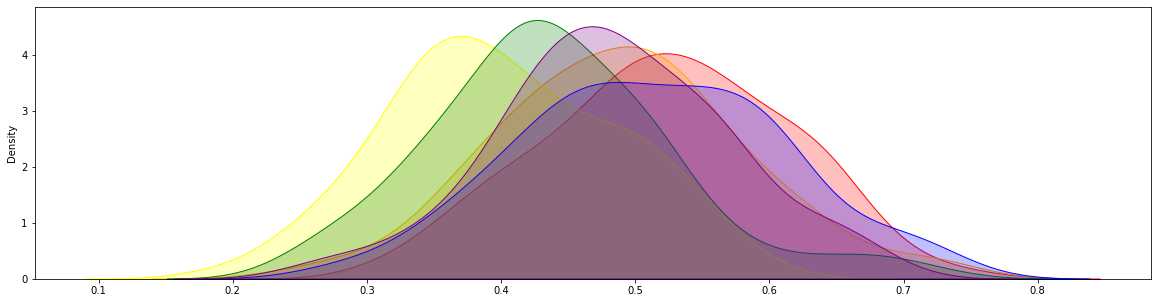

In [49]:
#Precision / Sensitivity

plt.figure(figsize=(20,5))

sns.kdeplot(data = indiv_scores[0], color="red", shade=True)
sns.kdeplot(data = mv_scores[0], color="orange", shade=True)
sns.kdeplot(data = cons2_scores[0], color="yellow", shade=True)
sns.kdeplot(data = cons3_scores[0], color="green", shade=True)
sns.kdeplot(data = lca2_scores[0], color="blue", shade=True)
sns.kdeplot(data = lca3_scores[0], color="purple", shade=True)
plt.show()

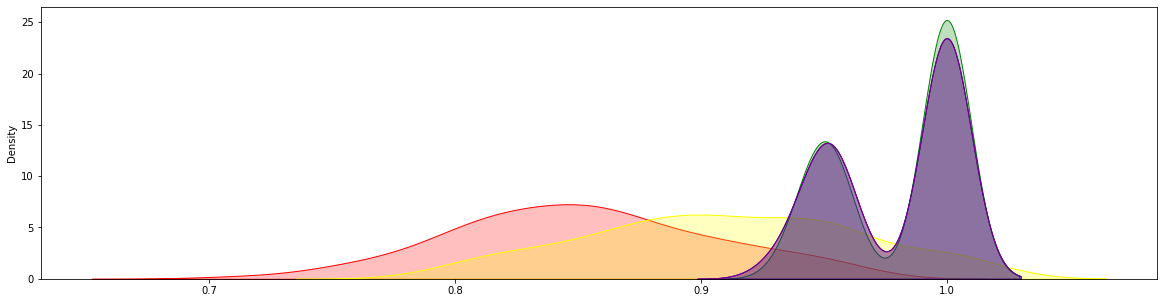

In [50]:
#Recall / Specificity

plt.figure(figsize=(20,5))

sns.kdeplot(data = indiv_scores[1], color="red", shade=True)
sns.kdeplot(data = mv_scores[1], color="orange", shade=True)
sns.kdeplot(data = cons2_scores[1], color="yellow", shade=True)
sns.kdeplot(data = cons3_scores[1], color="green", shade=True)
sns.kdeplot(data = lca2_scores[1], color="blue", shade=True)
sns.kdeplot(data = lca3_scores[1], color="purple", shade=True)
plt.show()

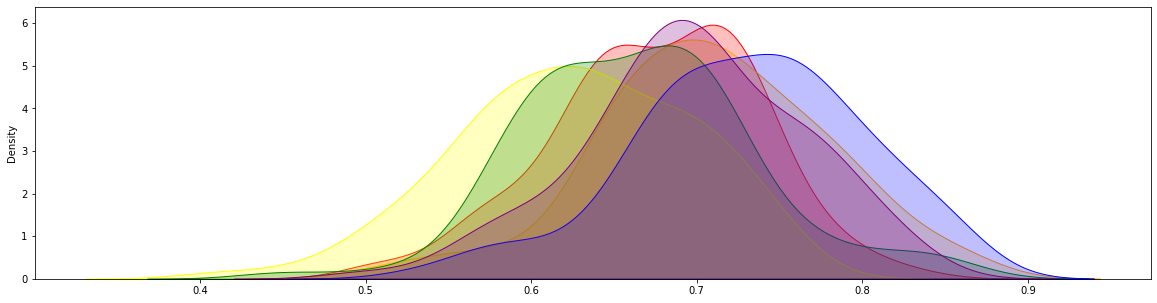

In [51]:
#f1-score / Accuracy

plt.figure(figsize=(20,5))

sns.kdeplot(data = indiv_scores[2], color="red", shade=True)
sns.kdeplot(data = mv_scores[2], color="orange", shade=True)
sns.kdeplot(data = cons2_scores[2], color="yellow", shade=True)
sns.kdeplot(data = cons3_scores[2], color="green", shade=True)
sns.kdeplot(data = lca2_scores[2], color="blue", shade=True)
sns.kdeplot(data = lca3_scores[2], color="purple", shade=True)
plt.show()

In [35]:
#Precision / Sensitivity

from scipy import stats

names = ['indiv_scores','mv_scores','cons2_scores','cons3_scores','lca2_scores','lca3_scores']
names_combs = list(combinations(names,2))

for idx, comb in enumerate(list(combinations([indiv_scores[0],mv_scores[0],cons2_scores[0],cons3_scores[0],lca2_scores[0],lca3_scores[0]],2))):
    t_stat, p_val = stats.ttest_ind(list(comb)[0], list(comb)[1],
                                    equal_var=False)
    print(names_combs[idx])
    print(f"t-statistics:{t_stat}, p-value: {p_val}")

('indiv_scores', 'mv_scores')
t-statistics:2.289276764502814, p-value: 0.02311904965979135
('indiv_scores', 'cons2_scores')
t-statistics:8.112445926031866, p-value: 5.731860180790342e-14
('indiv_scores', 'cons3_scores')
t-statistics:5.537380888001976, p-value: 9.810641526494763e-08
('indiv_scores', 'lca2_scores')
t-statistics:0.6110333538158025, p-value: 0.5418792771018772
('indiv_scores', 'lca3_scores')
t-statistics:2.4372551210278246, p-value: 0.015696193876488743
('mv_scores', 'cons2_scores')
t-statistics:5.773998918574842, p-value: 3.028620801083197e-08
('mv_scores', 'cons3_scores')
t-statistics:3.211335901042727, p-value: 0.0015435154141385098
('mv_scores', 'lca2_scores')
t-statistics:-1.6254456507681565, p-value: 0.10566549210602517
('mv_scores', 'lca3_scores')
t-statistics:0.04767120683224223, p-value: 0.9620267498643075
('cons2_scores', 'cons3_scores')
t-statistics:-2.594975259576776, p-value: 0.010170194999694728
('cons2_scores', 'lca2_scores')
t-statistics:-7.277546795987489,

In [36]:
#Recall / Specificity

from scipy import stats

names = ['indiv_scores','mv_scores','cons2_scores','cons3_scores','lca2_scores','lca3_scores']
names_combs = list(combinations(names,2))

for idx, comb in enumerate(list(combinations([indiv_scores[1],mv_scores[1],cons2_scores[1],cons3_scores[1],lca2_scores[1],lca3_scores[1]],2))):
    t_stat, p_val = stats.ttest_ind(list(comb)[0], list(comb)[1],
                                    equal_var=False)
    print(names_combs[idx])
    print(f"t-statistics:{t_stat}, p-value: {p_val}")

('indiv_scores', 'mv_scores')
t-statistics:-21.305847741176525, p-value: 3.785866014336264e-45
('indiv_scores', 'cons2_scores')
t-statistics:-6.658718202842235, p-value: 2.6797652249744743e-10
('indiv_scores', 'cons3_scores')
t-statistics:-21.079992423481713, p-value: 4.0475014147808915e-45
('indiv_scores', 'lca2_scores')
t-statistics:-21.305847741176525, p-value: 3.785866014336264e-45
('indiv_scores', 'lca3_scores')
t-statistics:-21.305847741176525, p-value: 3.785866014336264e-45
('mv_scores', 'cons2_scores')
t-statistics:13.637044524002128, p-value: 1.7049561950747084e-27
('mv_scores', 'cons3_scores')
t-statistics:0.12442923022583895, p-value: 0.9011018981125902
('mv_scores', 'lca2_scores')
t-statistics:0.0, p-value: 1.0
('mv_scores', 'lca3_scores')
t-statistics:0.0, p-value: 1.0
('cons2_scores', 'cons3_scores')
t-statistics:-13.452114062174683, p-value: 3.2571242457726275e-27
('cons2_scores', 'lca2_scores')
t-statistics:-13.637044524002128, p-value: 1.7049561950747084e-27
('cons2_sc

In [59]:
#f1-score / Accuracy

from scipy import stats

names = ['indiv_scores','mv_scores','cons2_scores','cons3_scores','lca2_scores','lca3_scores']
names_combs = list(combinations(names,2))

for idx, comb in enumerate(list(combinations([indiv_scores[2],mv_scores[2],cons2_scores[2],cons3_scores[2],lca2_scores[2],lca3_scores[2]],2))):
    t_stat, p_val = stats.ttest_ind(list(comb)[0], list(comb)[1],
                                    equal_var=False)
    print(names_combs[idx])
    print(f"t-statistics:{t_stat}, p-value: {p_val}")

('indiv_scores', 'mv_scores')
t-statistics:-3.77377202468111, p-value: 0.0002130873150840444
('indiv_scores', 'cons2_scores')
t-statistics:5.125245143919438, p-value: 7.139180671437796e-07
('indiv_scores', 'cons3_scores')
t-statistics:1.1522673473078435, p-value: 0.2506190492867398
('indiv_scores', 'lca2_scores')
t-statistics:-6.014460957199236, p-value: 8.729523617863925e-09
('indiv_scores', 'lca3_scores')
t-statistics:-2.4280451976543587, p-value: 0.0160793643389967
('mv_scores', 'cons2_scores')
t-statistics:8.411141126425203, p-value: 7.995797839045892e-15
('mv_scores', 'cons3_scores')
t-statistics:4.666075426957936, p-value: 5.645944905273272e-06
('mv_scores', 'lca2_scores')
t-statistics:-2.137903786530396, p-value: 0.03375047498590635
('mv_scores', 'lca3_scores')
t-statistics:1.3445656592039124, p-value: 0.18030574481784395
('cons2_scores', 'cons3_scores')
t-statistics:-3.7766416924967783, p-value: 0.00021015761274621416
('cons2_scores', 'lca2_scores')
t-statistics:-10.50233709459

In [75]:
# 95% CI

lst = [indiv_scores,mv_scores,cons2_scores,cons3_scores,lca2_scores,lca3_scores]
for item in lst:
    x = item[0]

    m = statistics.mean(x)
    s = statistics.stdev(x)

    dof = len(x)

    confidence = 0.95

    t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

    print(m, (m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof)))

0.5225925550359257 (0.5047901616910432, 0.5403949483808083)
0.4902313405090205 (0.4715847186413505, 0.5088779623766905)
0.4015281744046715 (0.38454111648105227, 0.4185152323282907)
0.4383350164159475 (0.4203074184914088, 0.45636261434048625)
0.5118791508423118 (0.4925744323731844, 0.5311838693114393)
0.48394102876355405 (0.46679759371231355, 0.5010844638147945)


In [22]:
statistics.mean(rec), statistics.stdev(rec)

(0.4848575043087241, 0.09442735330513066)

In [23]:
silvergt = pd.read_csv('./constructed/lesion-based_R20.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 23
FP 18
TN 47
FN 14
precision 0.5609756097560976
recall 0.6216216216216216
f1-score 0.5897435897435899


(0.5609756097560976, 0.6216216216216216, 0.5897435897435899)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

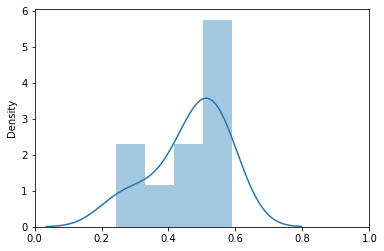

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(f1s)
plt.xlim(0, 1)
# plt.title('3 majority votes [n=120]')

## MV

In [197]:
k = 9
i = 7 # len(list(combinations(raters,k)))

In [198]:
len(list(combinations(raters,k))), list(combinations(raters,k))[i]

(10, ('R11', 'R14', 'R16', 'R20', 'R21', 'R23', 'R26', 'R28', 'R29'))

In [199]:
silvergt = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
silvergt = silvergt[silvergt[f'{k}vote{i}']==1][['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 23
FP 7
TN 50
FN 17
precision 0.7666666666666667
recall 0.575
f1-score 0.6571428571428571


(0.7666666666666667, 0.575, 0.6571428571428571)

In [28]:
omit_lst = list(set(range(1,101))-set(silvergt['DB_PatientId']))
omit_lst

[64, 49, 73]

### MV average f1-score

In [29]:
def average_score(k, score):
    if score == 'precision': idx = 0
    elif score == 'recall': idx = 1
    elif score == 'f1': idx = 2
        
    scores=[]
    for i in range(len(list(combinations(raters,k)))):
        selected_raters = list(combinations(raters,k))[i]
        majority_votes_df = pd.read_csv(f'./constructed/lesion-based_{k}_majority_votes.csv')
        majority_votes_df = majority_votes_df[majority_votes_df[f'{k}vote{i}']==1][['DB_PatientId','mask']]
        majority_votes_df = majority_votes_df.reset_index(drop=True)
        scores.append(f1score(majority_votes_df,THRES,prnt=False)[idx])

    average_score_ = statistics.mean(scores)
    sd_score_ = statistics.stdev(scores)
    print(f'=={k} majority votes f1-score [n = {len(list(combinations(raters,k)))}]==')
    print(f'ㄴaverage: {average_score_}')
    print(f'ㄴstandard deviation: {sd_score_}')

    return scores, average_score_, sd_score_

In [30]:
avg_precision_9 = average_score(9,'precision')[0]
avg_precision_7 = average_score(7,'precision')[0]
avg_precision_5 = average_score(5,'precision')[0]
avg_precision_3 = average_score(3,'precision')[0]

avg_recall_9 = average_score(9,'recall')[0]
avg_recall_7 = average_score(7,'recall')[0]
avg_recall_5 = average_score(5,'recall')[0]
avg_recall_3 = average_score(3,'recall')[0]

avg_f1_9 = average_score(9,'f1')[0]
avg_f1_7 = average_score(7,'f1')[0]
avg_f1_5 = average_score(5,'f1')[0]
avg_f1_3 = average_score(3,'f1')[0]

==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.7581182795698924
ㄴstandard deviation: 0.015706226514224993
==7 majority votes f1-score [n = 120]==
ㄴaverage: 0.762760068753319
ㄴstandard deviation: 0.026376233292309655
==5 majority votes f1-score [n = 252]==
ㄴaverage: 0.7614029236121937
ㄴstandard deviation: 0.029258420884323066
==3 majority votes f1-score [n = 120]==
ㄴaverage: 0.7430842454442108
ㄴstandard deviation: 0.03618243117672269
==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.5952810967380929
ㄴstandard deviation: 0.021682591979676542
==7 majority votes f1-score [n = 120]==
ㄴaverage: 0.5926823585424356
ㄴstandard deviation: 0.02926313730758341
==5 majority votes f1-score [n = 252]==
ㄴaverage: 0.5817162058730867
ㄴstandard deviation: 0.04260711772111495
==3 majority votes f1-score [n = 120]==
ㄴaverage: 0.5716860471368338
ㄴstandard deviation: 0.057873957738516855
==9 majority votes f1-score [n = 10]==
ㄴaverage: 0.6667740257972958
ㄴstandard deviation: 0.017837947819285042
==7 majo

In [57]:
from scipy import stats

In [74]:
# 95% CI

x = avg_recall_3

m = statistics.mean(x)
s = statistics.stdev(x)

dof = len(x)

confidence = 0.95

t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

(m-s*t_crit/np.sqrt(dof), m+s*t_crit/np.sqrt(dof))

(0.5612257870090457, 0.5821463072646219)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

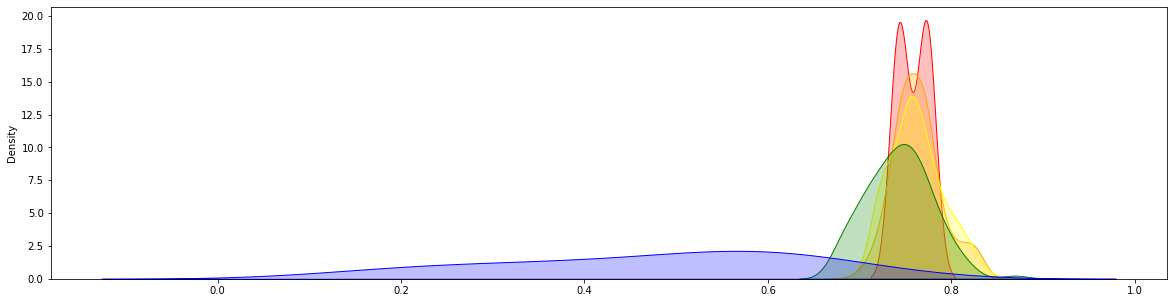

In [24]:
plt.figure(figsize=(20,5))

sns.kdeplot(data = avg_precision_9, color="red", shade=True)
sns.kdeplot(data = avg_precision_7, color="orange", shade=True)
sns.kdeplot(data = avg_precision_5, color="yellow", shade=True)
sns.kdeplot(data = avg_precision_3, color="green", shade=True)
sns.kdeplot(data = prec, color="blue", shade=True) # prec, rec, f1
plt.show()

In [25]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(avg_f1_5, avg_f1_3,
                                equal_var=False)
print(f"t-statistics:{t_stat}, p-value: {p_val}")

t-statistics:3.8514632252418575, p-value: 0.00015918453018197172


## Consensus

In [27]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 21
FP 11
TN 50
FN 19
precision 0.65625
recall 0.525
f1-score 0.5833333333333334


(0.65625, 0.525, 0.5833333333333334)

In [28]:
silvergt = pd.read_csv('./constructed/lesion-based_consensus3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 21
FP 10
TN 49
FN 20
precision 0.6774193548387096
recall 0.5121951219512195
f1-score 0.5833333333333334


(0.6774193548387096, 0.5121951219512195, 0.5833333333333334)

## LCA

In [29]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_2.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 22
FP 8
TN 50
FN 14
precision 0.7333333333333333
recall 0.6111111111111112
f1-score 0.6666666666666666


(0.7333333333333333, 0.6111111111111112, 0.6666666666666666)

In [30]:
silvergt = pd.read_csv('./constructed/lesion-based_lca_3.csv')
silvergt = silvergt[['DB_PatientId','mask']]
silvergt = silvergt.reset_index(drop=True)
f1score(silvergt,THRES)

TP 24
FP 9
TN 50
FN 18
precision 0.7272727272727273
recall 0.5714285714285714
f1-score 0.64


(0.7272727272727273, 0.5714285714285714, 0.64)

In [ ]:
# Target journal
IF >10
(25) Lancet digital health
(11 ->20?) Radiology v
(12) NPJ digital medicine (do as ai says)